# NOTES and Practice: IBM Course - Apache Spark for Scalable Machine Learning on BigData

# Resilient Distributed Dataset (RDD)

- HDFS(Hadoop Distributed File System): retrives the combined storage capacity of all disks as a single virtual file system
- RDDs: center of Apache Spark; center API

- distributed, immutable collection or lists of datasets
- could be created from HDFS(Hadoop Distributed File System), ObjectStore, NoSQL, simple file etc.
- it is stored in memory, but spillable to disk
- lazy, need to be called for computation 

https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD

In [1]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 189kB/s  eta 0:00:01
     |████████████████████████████████| 204kB 32.6MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [5]:
# import libraries
import pyspark as ps
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [19]:
  # set up the environment
'''
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()
'''

'\ntry:\n  from pyspark import SparkContext, SparkConf\n  from pyspark.sql import SparkSession\nexcept ImportError as e:\n  printmd(\'<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>\')\n\nsc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))\n\nspark = SparkSession   .builder   .getOrCreate()\n'

In [25]:
# get a list of date from 0 to 99
rdd = sc.parallelize(range(100))
# range(start, end=None, step=1, numSlices=None)[source]

# RDD is lazy; need to execute a function to get results

In [26]:
# a list number from 100, 199, take every other element
rdd = sc.parallelize(range(100, 200, 2))
rdd

PythonRDD[17] at RDD at PythonRDD.scala:53

In [27]:
# count the number of values
rdd.count()

50

In [28]:
# print out all values in rdd
print(rdd.collect())

# use when working with small number of items; otherwise, it will crush  

[100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]


In [29]:
# check the first 15 numbers
rdd.take(15)

[100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128]

In [30]:
# sum of all values
rdd.sum()

7450

In [ ]:
# no compuation is done as the no calculation is needed 
sc.parallelize(range(50, 101)).reduce(lambda a, b: a + b)

# sum from 1 to 100

## Transformation operation - Map: create a new RDD with resulting values

In [15]:
# map the function to the first 10 values
rdd.map(lambda x: x*x).take(20)

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361]

In [51]:
# add 1 to every str value and form a tuple

x = sc.parallelize(['panda', 'elephant', 'dog', 'cat', 'fish', 'bear'])
y = x.map(lambda x: (x, 1))
y.collect()

[('panda', 1),
 ('elephant', 1),
 ('dog', 1),
 ('cat', 1),
 ('fish', 1),
 ('bear', 1)]

In [52]:
# make a tuple with its length
x = sc.parallelize(['panda', 'elephant', 'dog', 'cat', 'fish', 'bear'])
y = x.map(lambda x: (x, len(x)))
y.collect()

[('panda', 5),
 ('elephant', 8),
 ('dog', 3),
 ('cat', 3),
 ('fish', 4),
 ('bear', 4)]

## reduceByKey transformation function: 
- merges the values for each key using an associative reduce function

**3 variants of this function:**
- reduceByKey(function): generate a hash-partitioned output with existing partitioner
- reduceByKey(function, [numPartition]): generate a hash-partitioned output with the number of partitions by numPartition 
- reduceByKey(partitioner, function): generate output using partitioner object

In [56]:
# create a paired rdd with key, val pairs
rdd_x = sc.parallelize([("a", 1), ("b", 1), ("a", 1), ("a", 1),
                    ("b", 1), ("b", 1), ("b", 1), ("b", 1),
                       ("c", 1), ("d", 2)])

# apply reduceByKey function
result_y = rdd_x.reduceByKey(lambda total, n: total + n )
result_y.collect()

[('b', 5), ('c', 1), ('d', 2), ('a', 3)]

## groupByKey transformation function: 
- it collects the values for each key in a form of an iterator
- it shuffles data from multiple partitions and create another RDD

In [78]:
# create a paired rdd with key, val pairs
rdd_x = sc.parallelize([("a", 3), ("b", 2), ("a", 3), ("a", 1),
                    ("b", 1), ("b", 1), ("b", 1), ("b", 1), ("d", 1),
                       ("c", 1), ("d", 1), ("c",5), ("c", 4)], 5)

# check partitions
res_y = rdd_x.groupByKey()
print("output:", res_y.getNumPartitions())

output: 5


In [79]:
## Print Output
for i in res_y.collect():
    print(i[0], [v for v in i[1]])

c [1, 5, 4]
d [1, 1]
a [3, 3, 1]
b [2, 1, 1, 1, 1]


In [80]:
# with predefined partiions
y = rdd_x.groupByKey(2)
print("output:", y.getNumPartitions())

output: 2


In [81]:
## Print Output
for i in y.collect():
    print(i[0], [v for v in i[1]])

b [2, 1, 1, 1, 1]
d [1, 1]
c [1, 5, 4]
a [3, 3, 1]


In [86]:
x = sc.parallelize([
    ("USA", 1), ("USA", 2), ("India", 1),
    ("UK", 1), ("India", 4), ("India", 9),
    ("USA", 8), ("USA", 3), ("India", 4),
    ("UK", 6), ("UK", 9), ("UK", 5)], 3)
y = x.groupByKey()

In [88]:
for pair in y.collect():
    print(pair[0], [v for v in pair[1]])

USA [1, 2, 8, 3]
UK [1, 6, 9, 5]
India [1, 4, 9, 4]


## Define a function to decies if a value is bigger than 50 (True) or not (False)

In [33]:
# define a function
def comp_50(val):
    if val > 50:
        return True
    else:
        return False

    """
# simplify this function 
def comp_50(val):
    return val > 50 # comparison: retuns a boolean
    """

In [35]:
print(comp_50(65))
print(comp_50(29))

True
False


In [37]:
# use a lambda function
comp_50 = lambda val: val > 50

In [38]:
print(comp_50(65))
print(comp_50(29))

True
False


In [40]:
# shuffle our list to make it a bit more interesting
from random import shuffle

ls = list(range(100))
shuffle(ls)
print(ls) 

# after shuffle(), get data randomly listed

[26, 92, 30, 1, 62, 12, 40, 43, 96, 19, 61, 18, 46, 51, 64, 95, 23, 65, 78, 13, 32, 21, 70, 90, 20, 91, 11, 49, 82, 6, 45, 76, 29, 98, 99, 88, 84, 38, 93, 79, 58, 67, 60, 35, 53, 14, 85, 71, 41, 2, 55, 97, 54, 34, 89, 25, 33, 59, 8, 48, 87, 94, 3, 63, 83, 68, 24, 15, 56, 75, 44, 74, 27, 39, 10, 50, 81, 42, 86, 5, 28, 73, 52, 47, 36, 31, 16, 9, 66, 7, 37, 4, 77, 69, 17, 57, 80, 72, 22, 0]


## Use rdd to filter data

- .filter(function)

In [44]:
# create a list of bumbers bet 50 and 100
ls = list(range(50, 101))
rdd_ls = sc.parallelize(ls)
print(rdd_ls.collect())

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [45]:
# check the number of values 
rdd_ls.count()

51

In [46]:
# filter values - use rdd.filter(function)
comp_70 = lambda val: val > 70
rdd.filter(comp_70).collect()

[71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [47]:
# or imbed a lambda function 
print(rdd_ls.filter(lambda val: val > 70).collect())

[71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [18]:
# compute the sum of elements greater than 50 but smaller than 75

rdd.filter(lambda val: val > 50).filter(lambda val: val < 75).sum()

1500

### practice: find even numbers

In [49]:
rdd_1 = sc.parallelize(range(53,120))
y = rdd_1.filter(lambda x: x%2==0)
print(y.collect(), y.sum())

[54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118] 2838


## Shuffle data

In [90]:
from random import shuffle
ls = list(range(100, 205, 3))
shuffle(ls)
rdd = sc.parallelize(ls)

In [93]:
print(rdd.collect())
print(rdd.count())

# values are shuffled in random order

[172, 148, 166, 142, 106, 139, 103, 133, 178, 181, 115, 100, 184, 190, 157, 193, 196, 121, 160, 202, 136, 187, 154, 199, 124, 127, 151, 118, 145, 109, 112, 169, 163, 130, 175]
35


In [95]:
# take first 10 values
print(rdd.take(10))

[172, 148, 166, 142, 106, 139, 103, 133, 178, 181]


In [96]:
# values biggter than 155
rdd.filter(lambda x: x> 155).collect()

[172,
 166,
 178,
 181,
 184,
 190,
 157,
 193,
 196,
 160,
 202,
 187,
 199,
 169,
 163,
 175]

In [99]:
# values bigger than 155, and smaller than 200
rdd.filter(lambda x: x > 155).filter(lambda x: x < 200).collect()

[172, 166, 178, 181, 184, 190, 157, 193, 196, 160, 187, 199, 169, 163, 175]

## Creating data frame and change df to SQL table

In [151]:
import pyspark
from pyspark.sql import Row

from pyspark.context import SparkContext
sc = SparkContext.getOrCreate()

from pyspark.sql.session import SparkSession
spark = SparkSession(sc)

In [101]:
df = spark.createDataFrame([Row(id =1, value = 'value1'), Row(id =2, value = 'value2')])
df.show()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+



In [102]:
# check the schema of the df
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- value: string (nullable = true)



#### register the df as a query table and issue an SQL statement

In [103]:
# register the df as temporary query table
df.createOrReplaceTempView('df_view')

# execute SQL query
df_results = spark.sql('select value from df_view where id = 2') # use sql statements
df_results.show()


# covert results into str
df_results.first().value # .value - grab only the value

+------+
| value|
+------+
|value2|
+------+



'value2'

In [104]:
# returns all records as a list of rows
df.collect()

[Row(id=1, value='value1'), Row(id=2, value='value2')]

In [105]:
# return columns of the df
df.columns

['id', 'value']

In [106]:
# return number of rows
df.count()

2

In [110]:
# check the value of the 1st row
df.first().value

'value1'

In [26]:
## query data online 

In [27]:
import pyspark
from pyspark.sql import Row

from pyspark.context import SparkContext
sc = SparkContext.getOrCreate()

from pyspark.sql.session import SparkSession
spark = SparkSession(sc)
from pyspark.sql import SQLContext


In [28]:
sparkSession = SQLContext.getOrCreate(sc).sparkSession

In [29]:
# cloudant_date = sparkSession.read.format('com.cloudant.spark').\
# option("cloudant.host","0495289b-1beb-4e6d-888e-315f36925447-bluemix.cloudant.com"). \
# option("cloudant.username","0495289b-1beb-4e6d-888e-315f36925447-bluemix"). \
# option("cloudant.password","0b7338d23c08afaf12b2a40dfcd5999a8826f0d8dc7b9726f051174d93a36de9"). \
# load("washingflat")


# Stastical computation 

In [111]:
rdd = sc.parallelize(range(100, 200, 2))

### mean

In [114]:
# average

sum_rdd = rdd.sum()
n = rdd.count()

avg = sum_rdd/n
avg

149.0

### median 

In [144]:
# sort the list and pick the middle of the list
rdd = sc.parallelize(list(range(100, 200, 2)) + [300, 402, 203])

# sort the list
y = rdd.sortBy(lambda x: x) 
print(y.collect())

[100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 203, 300, 402]


In [145]:
# add index to access the middle of the list
# rdd.sortBy(lambda x: x).zipWithIndex().collect()
y.zipWithIndex().collect() 

# but the index is the 2nd value

[(100, 0),
 (102, 1),
 (104, 2),
 (106, 3),
 (108, 4),
 (110, 5),
 (112, 6),
 (114, 7),
 (116, 8),
 (118, 9),
 (120, 10),
 (122, 11),
 (124, 12),
 (126, 13),
 (128, 14),
 (130, 15),
 (132, 16),
 (134, 17),
 (136, 18),
 (138, 19),
 (140, 20),
 (142, 21),
 (144, 22),
 (146, 23),
 (148, 24),
 (150, 25),
 (152, 26),
 (154, 27),
 (156, 28),
 (158, 29),
 (160, 30),
 (162, 31),
 (164, 32),
 (166, 33),
 (168, 34),
 (170, 35),
 (172, 36),
 (174, 37),
 (176, 38),
 (178, 39),
 (180, 40),
 (182, 41),
 (184, 42),
 (186, 43),
 (188, 44),
 (190, 45),
 (192, 46),
 (194, 47),
 (196, 48),
 (198, 49),
 (203, 50),
 (300, 51),
 (402, 52)]

In [146]:
# revise the value and key in a tuple

# sorted_rdd = rdd.sortBy(lambda x: x).zipWithIndex().map(lambda valuekey: (valuekey[1],valuekey[0]))
sorted_rdd = y.zipWithIndex().map(lambda vk: (vk[1],vk[0]))
sorted_rdd.collect()

[(0, 100),
 (1, 102),
 (2, 104),
 (3, 106),
 (4, 108),
 (5, 110),
 (6, 112),
 (7, 114),
 (8, 116),
 (9, 118),
 (10, 120),
 (11, 122),
 (12, 124),
 (13, 126),
 (14, 128),
 (15, 130),
 (16, 132),
 (17, 134),
 (18, 136),
 (19, 138),
 (20, 140),
 (21, 142),
 (22, 144),
 (23, 146),
 (24, 148),
 (25, 150),
 (26, 152),
 (27, 154),
 (28, 156),
 (29, 158),
 (30, 160),
 (31, 162),
 (32, 164),
 (33, 166),
 (34, 168),
 (35, 170),
 (36, 172),
 (37, 174),
 (38, 176),
 (39, 178),
 (40, 180),
 (41, 182),
 (42, 184),
 (43, 186),
 (44, 188),
 (45, 190),
 (46, 192),
 (47, 194),
 (48, 196),
 (49, 198),
 (50, 203),
 (51, 300),
 (52, 402)]

In [147]:
# find the middle point(s)
n = sorted_rdd.count()
if n%2 == 1:
    ind = (n-1)/2
    print("odd case:")
    print(sorted_rdd.lookup(ind))
else:
    ind1 = n/2 -1
    ind2 = n/2
    val1 = sorted_rdd.lookup(ind1)[0] # sorted_rdd.lookup(ind1) is a list; need to get values from the list
    val2 = sorted_rdd.lookup(ind2)[0]
    print("even case", val1, val2)
    print((val1 + val2)/2)

odd case:
[152]


### standard deviation

In [153]:
# standard deviation 
import math
rdd = sc.parallelize(list(range(100, 200, 2)) + [300, 402, 203, 305, 421, 2000])
mean = rdd.sum()/rdd.count()
std = math.sqrt(rdd.map(lambda x : pow(x-mean,2)).sum()/rdd.count())
std

250.78897379071512

### skewness

In [158]:
# skewness = sum{(xi-xmean)^3}/(std^3*n)
# adjustment normalization term n/((n-1)*(n-2))
import math
rdd = sc.parallelize(list(range(100, 200, 2)) + [300, 402, 203, 305, 421, 2000])
mean = rdd.sum()/rdd.count()
std = math.sqrt(rdd.map(lambda x : pow(x-mean,2)).sum()/rdd.count())
skew = rdd.map(lambda x : pow(x-mean,3)).sum()/(pow(std,3) * rdd.count())
skew

6.637126695176014

### kurtosis

In [159]:
# kurtosis = sum{(xi-xmean)^4)/(std^4*n)
import math
rdd = sc.parallelize(list(range(100, 200, 2)) + [300, 402, 203, 305, 421, 2000])
mean = rdd.sum()/rdd.count()
std = math.sqrt(rdd.map(lambda x : pow(x-mean,2)).sum()/rdd.count())
kurt = rdd.map(lambda x : pow(x-mean,4)).sum()/(pow(std,4) * rdd.count())
kurt

47.636533608102766

**Kurtosis** is a measure of outlier content. 

- The more outliers are present in examples of fuel consumption where engines didn't fail, the higher the false positive rate gets when choosing a threshold value which is too low.
- if data is symmtric, fewer outliers; otherise, more outliers, higher kurtosis

## Covariance
- how two columns correlate with each other; measure of dependency

cov(X,Y) = 1/n * sum{(xi - xmean)*(yi - ymean))

In [164]:
rddX = sc.parallelize(range(100))
rddY = sc.parallelize(range(100,200))

meanX = rddX.sum()/rdd.count()
meanY = rddY.sum()/rdd.count()

meanX, meanY

(88.39285714285714, 266.9642857142857)

In [165]:
# combine rddX and rddY
rddXY = rddx.zip(rddy)
rddXY.take(10)

[(0, 100),
 (1, 101),
 (2, 102),
 (3, 103),
 (4, 104),
 (5, 105),
 (6, 106),
 (7, 107),
 (8, 108),
 (9, 109)]

In [168]:
# in python 3, lambda(x,y): (x - 10)*(y-5) unpacking is not allowed; use xy: xy[0], xy[1]
covXY = rddXY.map(lambda xy : (xy[0]-meanX)*(xy[1]-meanY)).sum()/rddXY.count()
covXY

# vaues are not between -1 and + 1

5401.771683673469

In [169]:
# calculate correlation
# corrXY = covXY/ (stdx*stdy)
import math
stdX = math.sqrt(rddX.map(lambda x : pow(x-meanX,2)).sum()/ rddXY.count())
stdY = math.sqrt(rddY.map(lambda x : pow(x-meanY,2)).sum()/ rddXY.count())
print(stdX,stdY)

corrXY = covXY/(stdX*stdY)
print(corrXY)


48.434536611127946 120.95911878964458
0.9220244986680797


In [179]:
## correlation among 4 columns
import random
col1 = sc.parallelize(range(100))
col2 = sc.parallelize(range(100,200))
col3 = sc.parallelize(list(reversed(range(100))))
col4 = sc.parallelize(random.sample(range(200),100)) # randomy generate 100 numbers bet 0 and 199

# use spark mllib to do this; and RDD under this

from pyspark.mllib.stat import Statistics

data = col1.zip(col2).zip(col3).zip(col4)
print(data.take(10))
# output tuples within tuples ((0, 100), 99), 79) 
print("----"*50)
# flatten the data
data_flatten = data.map(lambda abcd: (abcd[0][0][0],abcd[0][0][1],abcd[0][1],abcd[1]))
print(data_flatten.take(10))
# map(lambda abcd: (abcd[0], abcd[1],abcd[2],abcd[3]))

[(((0, 100), 99), 14), (((1, 101), 98), 123), (((2, 102), 97), 99), (((3, 103), 96), 199), (((4, 104), 95), 64), (((5, 105), 94), 74), (((6, 106), 93), 96), (((7, 107), 92), 166), (((8, 108), 91), 48), (((9, 109), 90), 151)]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[(0, 100, 99, 14), (1, 101, 98, 123), (2, 102, 97, 99), (3, 103, 96, 199), (4, 104, 95, 64), (5, 105, 94, 74), (6, 106, 93, 96), (7, 107, 92, 166), (8, 108, 91, 48), (9, 109, 90, 151)]


In [180]:
Statistics.corr(data_flatten)

array([[ 1.        ,  1.        , -1.        , -0.10841047],
       [ 1.        ,  1.        , -1.        , -0.10841047],
       [-1.        , -1.        ,  1.        ,  0.10841047],
       [-0.10841047, -0.10841047,  0.10841047,  1.        ]])

## Quiz practice

In [181]:
ls = [1,2,4,5,34,1,32,4,34,2,1,3]
rdd = sc.parallelize(ls)

# rdd.mean
rdd.sortBy(lambda x: x).zipWithIndex().collect()

[(1, 0),
 (1, 1),
 (1, 2),
 (2, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (4, 7),
 (5, 8),
 (32, 9),
 (34, 10),
 (34, 11)]

In [183]:
# kurtosis of ls2

ls2=[34,1,23,4,3,3,12,4,3,1]
rdd = sc.parallelize(ls2)
mean = rdd.sum()/rdd.count()

import math
std = math.sqrt(rdd.map(lambda x : pow(x-mean,2)).sum()/rdd.count())
print("std = ", std)

kurt = rdd.map(lambda x : pow(x-mean,4)).sum()/( pow(std,4)*rdd.count())
print("kurtosis = ", kurt)

std =  10.562196741208714
kurtosis =  3.663124005193276


In [185]:
# corr between 2 lists
## correlation among 4 columns
import random
a = sc.parallelize([1,2,3,4,5,6,7,8,9,10])
b = sc.parallelize([7,6,5,4,5,6,7,8,9,10])

# use spark mllib to do this; and RDD under this

from pyspark.mllib.stat import Statistics

data = a.zip(b)
Statistics.corr(data)

array([[1.        , 0.70927291],
       [0.70927291, 1.        ]])

In [186]:
# calculate covariance betwen a and b

# in python 3, lambada(x,y): (x - 10)*(y-5) unpacking is not allowed; use xy: xy[0], xy[1]
meanA = a.sum()/a.count()
meanB = b.sum()/b.count()
covAB = data.map(lambda xy : (xy[0]-meanA)*(xy[1]-meanB)).sum()/data.count()
covAB

3.65

In [188]:
# calculate correlation betwen a and b

import math
stdA = math.sqrt(a.map(lambda x : pow(x-meanA,2)).sum()/ data.count())
stdB = math.sqrt(b.map(lambda x : pow(x-meanB,2)).sum()/ data.count())
print("standard deviation of list A:", stdA)
print("standard deviation of list B:", stdB)

corrAB = covAB/(stdA*stdB)
print("correlation of list A and B:", corrAB)

standard deviation of list A: 2.8722813232690143
standard deviation of list B: 1.7916472867168916
correlation of list A and B: 0.709272912083725


### Practice with data frames

In [198]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [205]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

# parsing
spark = SparkSession \
    .builder \
    .getOrCreate()

In [206]:
# delete files from previous runs if there is any
!rm -f hmp.parquet*
# download data
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet

--2020-05-11 02:47:23--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-05-11 02:47:23--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-05-11 02:47:24--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Savin

In [209]:
df = spark.read.parquet('hmp.parquet')
# register a corresponding query table
df.createOrReplaceTempView('df')

In [211]:
df.show()
# df.printSchema()

+---+---+---+--------------------+-----------+
|  x|  y|  z|              source|      class|
+---+---+---+--------------------+-----------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|
| 20| 50| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 50| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 35|Accelerometer-201...|Brush_teeth|
| 21| 51| 33|Accelerometer-201...|Brush_teeth|
| 20| 50| 34|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 20| 51| 35|Accelerometer-201...|Brush_teeth|
| 18| 49| 34|Accelerometer-201...|Brush_teeth|
| 19| 48| 34|Accelerometer-201...|Brush_teeth|
| 16| 53| 34|Accelerometer-201...|Brush_teeth|
| 18| 52| 35|

- this is a classification dataset

details about the dataset: https://github.com/wchill/HMP_Dataset

#### check the classes

In [257]:
# check the classes
spark.sql("select class, count(*) from df group by class").show()

+--------------+--------+
|         class|count(1)|
+--------------+--------+
| Use_telephone|   15225|
| Standup_chair|   25417|
|      Eat_meat|   31236|
|     Getup_bed|   45801|
|   Drink_glass|   42792|
|    Pour_water|   41673|
|     Comb_hair|   23504|
|          Walk|   92254|
|  Climb_stairs|   40258|
| Sitdown_chair|   25036|
|   Liedown_bed|   11446|
|Descend_stairs|   15375|
|   Brush_teeth|   29829|
|      Eat_soup|    6683|
+--------------+--------+



In [258]:
# or use below
df.groupby('class').count().show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Use_telephone|15225|
| Standup_chair|25417|
|      Eat_meat|31236|
|     Getup_bed|45801|
|   Drink_glass|42792|
|    Pour_water|41673|
|     Comb_hair|23504|
|          Walk|92254|
|  Climb_stairs|40258|
| Sitdown_chair|25036|
|   Liedown_bed|11446|
|Descend_stairs|15375|
|   Brush_teeth|29829|
|      Eat_soup| 6683|
+--------------+-----+



#### create a bar plot with pixiedust


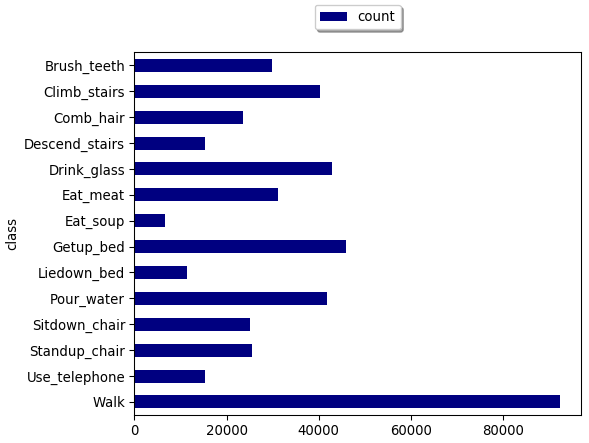

In [259]:
import pixiedust
from pyspark.sql.functions import col

counts = df.groupBy('class').count().orderBy('count')
display(counts)

In [250]:
counts.show()
# a dataframe

+--------------+-----+
|         class|count|
+--------------+-----+
|      Eat_soup| 6683|
|   Liedown_bed|11446|
| Use_telephone|15225|
|Descend_stairs|15375|
|     Comb_hair|23504|
| Sitdown_chair|25036|
| Standup_chair|25417|
|   Brush_teeth|29829|
|      Eat_meat|31236|
|  Climb_stairs|40258|
|    Pour_water|41673|
|   Drink_glass|42792|
|     Getup_bed|45801|
|          Walk|92254|
+--------------+-----+



In [ ]:
result_rdd = result.rdd.map(lambda row : (row.ts, row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()


#### get more aggregated results using spark.sql

In [263]:
spark.sql(
    '''
    select *, max/min as minMaxRatio
    from (select min(ct) as min, max(ct) as max, mean(ct) as mean, stddev(ct) as std
          from (select count(*) as ct
                from df
                group by class
                )
            )
    
''').show()

+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|               std|      minMaxRatio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



In [278]:
## use dataframe API

from pyspark.sql.functions import col, min, max, mean, stddev

df.groupby('class').count()\
    .select([
            min(col('count')).alias('min'), 
            max(col('count')).alias('max'),
            mean(col('count')).alias('mean'),
            stddev(col('count')).alias('std')])\
    .select([col('*'), (col("max") / col("min")).alias('minmaxratio')
            ]).show()

+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|               std|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



##### further practice on df

- 1. create a table of all classes with the respective counts, but this time, please order the table by the count number, ascending.

In [281]:
spark.sql(
    '''
    select class, count(*) as count
    from df
    group by class
    order by count asc
    
''').show()

+--------------+-----+
|         class|count|
+--------------+-----+
|      Eat_soup| 6683|
|   Liedown_bed|11446|
| Use_telephone|15225|
|Descend_stairs|15375|
|     Comb_hair|23504|
| Sitdown_chair|25036|
| Standup_chair|25417|
|   Brush_teeth|29829|
|      Eat_meat|31236|
|  Climb_stairs|40258|
|    Pour_water|41673|
|   Drink_glass|42792|
|     Getup_bed|45801|
|          Walk|92254|
+--------------+-----+



- 2. Pixiedust is a very sophisticated library. It takes care of sorting as well. Please modify the bar chart so that it gets sorted by the number of elements per class, ascending. Hint: It’s an option available in the UI once rendered using the display() function.


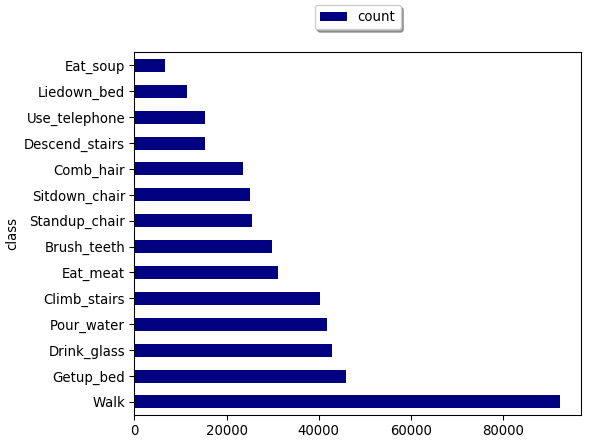

In [282]:
import pixiedust
from pyspark.sql.functions import col

counts = df.groupBy('class').count().orderBy('count')
display(counts)

- 3. Imbalanced classes can cause pain in machine learning. Therefore let’s rebalance. In the flowing we limit the number of elements per class to the amount of the least represented class. This is called undersampling. Other ways of rebalancing can be found here:

In [292]:
from pyspark.sql.functions import min

# create distinct classes 
distinct_classes = df.select('class').distinct()
classes = [row[0] for row in distinct_classes.collect()]

# compute the number of items in the smallest class 
min_class = df.groupBy('class').count().select(min('count')).first()[0]

# only select examples for the specific class within this iteration
# shuffle the order of the elements (by setting fraction to 1.0 sample works like shuffle)
# return only the first n samples
df_balanced = None
for cls in classes:
    df_temp = df.filter("class = '"+cls+"'").sample(False, 1.0).limit(min_class)
                        
    if df_balanced == None:
        df_balanced = df_temp
    else:
        df_balanced = df_balanced.union(df_temp)

- Please verify, by using the code cell below, if df_balanced has the same number of elements per class. You should get 6683 elements per class.

In [298]:
df_balanced.groupBy('class').count().show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Use_telephone| 6683|
| Standup_chair| 6683|
|      Eat_meat| 6683|
|     Getup_bed| 6683|
|   Drink_glass| 6683|
|    Pour_water| 6683|
|     Comb_hair| 6683|
|          Walk| 6683|
|  Climb_stairs| 6683|
| Sitdown_chair| 6683|
|   Liedown_bed| 6683|
|Descend_stairs| 6683|
|   Brush_teeth| 6683|
|      Eat_soup| 6683|
+--------------+-----+



## Matplotlib for visualization 

-  when there are more data than you can process at once: sample data to work on a smaller amount 

In [299]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [300]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

## exercise 3.1
- Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database.

In [301]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-05-11 04:49:20--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2020-05-11 04:49:20--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2020-05-11 04:49:20--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [326]:
df = spark.read.parquet('washing.parquet')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [303]:
# use Spark SQL
df.createOrReplaceTempView("washing")
spark.sql("SELECT * FROM washing").show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [308]:
result = spark.sql('select voltage from washing where voltage is not null')
result.take(10), result.count()
# not in the format we want

([Row(voltage=236),
  Row(voltage=235),
  Row(voltage=228),
  Row(voltage=236),
  Row(voltage=233),
  Row(voltage=226),
  Row(voltage=235),
  Row(voltage=220),
  Row(voltage=225),
  Row(voltage=239)],
 448)

In [309]:
# format result in an array

result_array = result.rdd.map(lambda row: row.voltage).sample(False, 0.1).collect() # randomly sample 10% data
len(result_array) 

43

In [310]:
# plot the data 
import matplotlib.pyplot as plt
%matplotlib inline

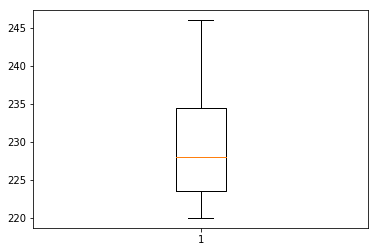

In [311]:
plt.boxplot(result_array)
plt.show()

In [316]:
result = spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")
result.show()

+-------+-------------+
|voltage|           ts|
+-------+-------------+
|    221|1547808722910|
|    223|1547808725914|
|    222|1547808728916|
|    236|1547808731918|
|    234|1547808734922|
|    234|1547808737926|
|    235|1547808740927|
|    235|1547808743928|
|    222|1547808746929|
|    225|1547808749929|
|    227|1547808752930|
|    224|1547808755932|
|    235|1547808758933|
|    230|1547808761934|
|    221|1547808764937|
|    224|1547808767938|
|    239|1547808770939|
|    228|1547808773944|
|    235|1547808776948|
|    220|1547808779950|
+-------+-------------+
only showing top 20 rows



In [319]:
# get the distribution of voltage over time
result = spark.sql('''select voltage,ts 
                   from washing 
                   where voltage is not null 
                   order by ts asc ''')
result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts, row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
print(result_array_ts[:15])
print(result_array_voltage[:15])

[1547808734922, 1547808767938, 1547808770939, 1547808806965, 1547808833983, 1547808836984, 1547808888076, 1547808903087, 1547808927099, 1547808981157, 1547808996171, 1547809035209, 1547809080236, 1547809101247, 1547809122262]
[234, 224, 239, 221, 222, 224, 220, 220, 234, 228, 255, 222, 235, 232, 235]


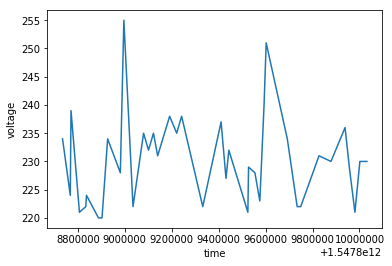

In [320]:
# plot data
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [321]:
# chekc the min and max time
spark.sql("select min(ts),max(ts) from washing").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



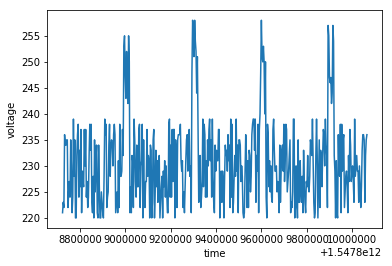

In [322]:
# show data for an hour
# an interval of 60 minutes (10006060)=3600000 within the range above 
# (note that we have removed the sample function because the data set is already reduced)

result = spark.sql(
"""
select voltage,ts from washing 
    where voltage is not null and 
    ts > 1547808720911 and
    ts <= 1547810064867+3600000
    order by ts asc
""")
result_rdd = result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()


In [323]:
# 3-d Scatterplot
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

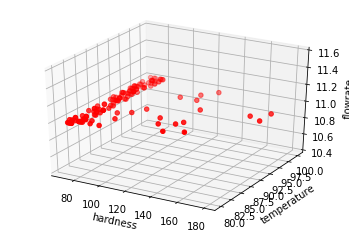

In [324]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

You will notice that the individual points resemble in some sort of plane. But this is not a surprise. Actually we can draw the following conclusions from the plot:
- most of the data points are lying around hardness 60-80, temperature 80-100 and flowrate 80-100
- there are some outliers, especially when it comes to the range of hardness 100-200
- the data follows some narrow boundaries

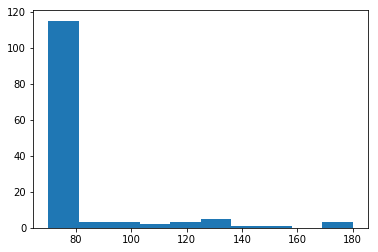

In [325]:
# double check the distrubution of occurrences
plt.hist(result_array_hardness)
plt.show()
